## 데이터 불러오기

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
# 1️⃣ 데이터 로딩 및 기본 정보 확인

import pandas as pd

# 구글 드라이브에서 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다


filename = '/content/drive/MyDrive/RIDAR/data/train.csv'
data_train = pd.read_csv(filename)

filename = '/content/drive/MyDrive/RIDAR/data/test.csv'
data_test = pd.read_csv(filename)

filename = '/content/drive/MyDrive/RIDAR/data/meta/y_feature_spec_info.csv'
data_threshold = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 분석

In [5]:
# y feature data의 threashold에 따른 정상 / 비정상 label 부여
def get_label(data_df):
  label = []
  for i in range(data_df.shape[0]):
    is_anomaly = False
    for idx in range(len(data_threshold)):
      if data_df[data_threshold["Feature"].iloc[idx]].iloc[i] < data_threshold["최소"].iloc[idx]:
        is_anomaly = True
        break
      elif data_df[data_threshold["Feature"].iloc[idx]].iloc[i] > data_threshold["최대"].iloc[idx]:
        is_anomaly = True
        break
    if is_anomaly:
      label.append(1)
    else:
      label.append(0)
  return label

In [6]:
data_threshold.head()

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5


In [7]:
data_train["label"] = get_label(data_train)

In [8]:
data_train.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14,label
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304,1
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438,0
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370,0
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345,0
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974,0


In [9]:
data_test.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


### 데이터 target 분포 확인

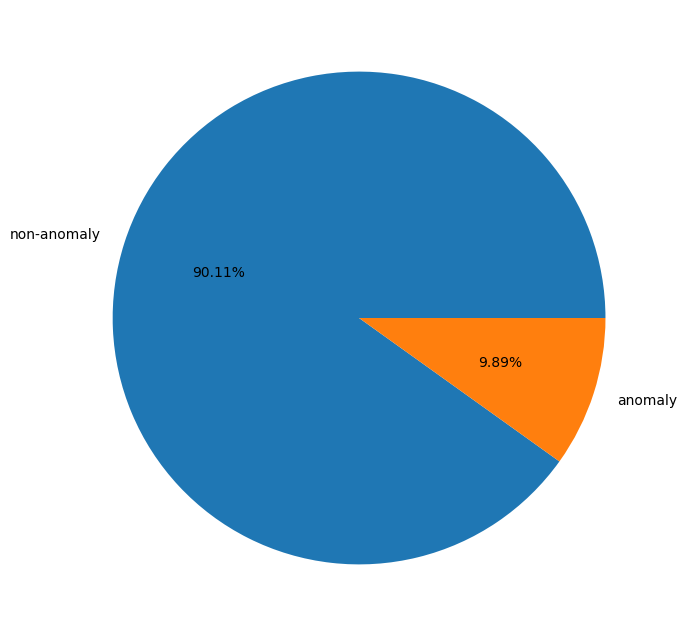

In [10]:
result = [0, 0]

for i in range(data_train.shape[0]):

    if data_train["label"].iloc[i] == 0:
        result[0] += 1
    else:
        result[1] += 1

labels = ["non-anomaly", "anomaly"]
result = np.array(result)

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색

ax = fig.add_subplot() ## 프레임 생성

ax.pie(x=result,labels=labels,autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.show()

# 데이터 전처리

In [11]:
X_drop_list = ['ID', "label"]
for i in range(1, 15):
  i = str(i)
  if len(i) == 1:
    i = '0'+i
  X_drop_list.append("Y_"+i)

Y_drop_list = ['ID']
for i in range(1, 57):
  i = str(i)
  if len(i) == 1:
    i = '0'+i
  Y_drop_list.append("X_"+i)

data_train_X = data_train.drop(X_drop_list, axis = 1)
data_train_y = data_train.drop(Y_drop_list, axis = 1)
data_test = data_test.drop(["ID"], axis = 1)

# 추가 필요없는 x feature drop
drop_list = ["X_04", "X_23", "X_47", "X_48"]
data_train_X = data_train_X.drop(drop_list, axis = 1)
data_test = data_test.drop(drop_list, axis = 1)

### 파생변수 생성

In [12]:
data_train_X.columns

Index(['X_01', 'X_02', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19',
       'X_20', 'X_21', 'X_22', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29',
       'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38',
       'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_49',
       'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56'],
      dtype='object')

In [13]:
def get_values(data_df, start_val, end_val, get_std = False):
  diff = []
  std = []
  for i in range(data_df.shape[0]):
    vals = []
    for s in range(start_val, end_val + 1):
      vals.append(data_df["X_"+str(s)].iloc[i])
    diff.append(max(vals) - min(vals))
    if get_std:
      std.append(np.std(vals))
  return diff, std

def get_sum_values(data_df, val_list):
  sums = []
  for i in range(data_df.shape[0]):
    vals = []
    for s in val_list:
      vals.append(data_df["X_"+str(s)].iloc[i])
    sums.append(sum(vals))
  return sums

In [14]:

### 무게 / 면적
data_train_X["X_03/X_07"] = data_train_X["X_03"] / data_train_X["X_07"]
data_test["X_03/X_07"] = data_test["X_03"] / data_test["X_07"]

### 레이돔 치수 차이 ###
diff, std = get_values(data_train_X, 41, 44)
data_train_X["X_41~44-diff"] = diff
diff, std = get_values(data_test, 41, 44)
data_test["X_41~44-diff"] = diff

### 1~4 단계별 누름량 합산 ###
sums = get_sum_values(data_train_X, ["01", "02", "05", "06"])
data_train_X["X_1~6_push-sum"] = sums
sums = get_sum_values(data_test, ["01", "02", "05", "06"])
data_test["X_1~6_push-sum"] = sums

### 방열 재료 면적 합산 ###
sums = get_sum_values(data_train_X, ["07", "08", "09"])
data_train_X["X_7~9_area-sum"] = sums
sums = get_sum_values(data_test, ["07", "08", "09"])
data_test["X_7~9_area-sum"] = sums

### 스크류 삽입 깊이가 재질과 관련?
data_train_X["X_03/X_19~22"] = data_train_X["X_03"]/(data_train_X["X_19"]+data_train_X["X_20"]+data_train_X["X_21"]+data_train_X["X_22"])
data_test["X_03/X_19~22"] = data_test["X_03"]/(data_test["X_19"]+data_test["X_20"]+data_test["X_21"]+data_test["X_22"])

# 커넥터 위치 좌표와 커넥터핀 치수 관계
data_train_X["X_12/X_24~25"] = data_train_X["X_12"] / ((data_train_X["X_24"]+data_train_X["X_25"])/2)
data_test["X_12/X_24~25"] = data_test["X_12"] / ((data_test["X_24"]+data_test["X_25"])/2)

#importance 높은 데이터 조합
data_train_X["49_7_19_3_8"] = data_train_X["X_49"] / data_train_X["X_49"].mean()+data_train_X["X_07"] / data_train_X["X_07"].mean()+data_train_X["X_19"] / data_train_X["X_19"].mean()+data_train_X["X_03"] / data_train_X["X_03"].mean()
data_test["49_7_19_3_8"] = data_test["X_49"] / data_train_X["X_49"].mean()+data_test["X_07"] / data_train_X["X_07"].mean()+data_test["X_19"] / data_train_X["X_19"].mean()+data_test["X_03"] / data_train_X["X_03"].mean()

In [15]:
data_train_y.head()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14,label
0,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304,1
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438,0
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370,0
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345,0
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974,0


# 모델 생성

### nrmse score metric

In [16]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
tf.random.set_seed(42)

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(14): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:7]) + 1.0 * np.sum(all_nrmse[7:14])
    return score

### Requirement

In [17]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


In [18]:
!pip install lightgbm==2.2.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [19]:
!pip install xgboost==0.90

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


## Custom multiouputRegressor
for use early stopping & model save, load

In [23]:
#from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from joblib import delayed  # ✅ 정상 경로

from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputRegressor
import lightgbm

class MyMultiOutputRegressor_LGBM(MultiOutputRegressor):

    def fit(self, X, y, sample_weight=None, **fit_params):
        """ Fit the model to data.
        Fit a separate model for each output variable.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Data.
        y : {array-like, sparse matrix} of shape (n_samples, n_outputs)
            Multi-output targets. An indicator matrix turns on multilabel
            estimation.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted.
            Only supported if the underlying regressor supports sample
            weights.
        **fit_params : dict of string -> object
            Parameters passed to the ``estimator.fit`` method of each step.
            .. versionadded:: 0.23
        Returns
        -------
        self : object
        """

        if not hasattr(self.estimator, "fit"):
            raise ValueError("The base estimator should implement"
                             " a fit method")

        X, y = self._validate_data(X, y,
                                   force_all_finite=False,
                                   multi_output=True, accept_sparse=True)

        if is_classifier(self):
            check_classification_targets(y)

        if y.ndim == 1:
            raise ValueError("y must have at least two dimensions for "
                             "multi-output regression but has only one.")

        if (sample_weight is not None and
                not has_fit_parameter(self.estimator, 'sample_weight')):
            raise ValueError("Underlying estimator does not support"
                             " sample weights.")

        lambda_y = lambda i: '0'+str(i+1) if i<9 else str(i+1)

        fit_params_validated = _check_fit_params(X, fit_params)
        [(X_test, Y_test)] = fit_params_validated.pop('eval_set')
        self.estimators_ = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_estimator)(
                self.estimator, X, y[:, i], sample_weight,
                **fit_params_validated,
                eval_set=[(X_test, Y_test[:, i])],
                eval_names="Y_" + lambda_y(i),
                verbose=-1,
                callbacks=[lightgbm.early_stopping(200)])
            for i in range(y.shape[1]))
        return self

    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            estimator.booster_.save_model(save_path)

    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            self.estimators_[chain_idx] = lightgbm.Booster(save_path)

In [24]:
#from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from joblib import delayed  # ✅ 정상 경로

from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputRegressor
import xgboost
import pickle

class MyMultiOutputRegressor_XGB(MultiOutputRegressor):

    def fit(self, X, y, sample_weight=None, **fit_params):
        """ Fit the model to data.
        Fit a separate model for each output variable.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Data.
        y : {array-like, sparse matrix} of shape (n_samples, n_outputs)
            Multi-output targets. An indicator matrix turns on multilabel
            estimation.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted.
            Only supported if the underlying regressor supports sample
            weights.
        **fit_params : dict of string -> object
            Parameters passed to the ``estimator.fit`` method of each step.
            .. versionadded:: 0.23
        Returns
        -------
        self : object
        """

        if not hasattr(self.estimator, "fit"):
            raise ValueError("The base estimator should implement"
                             " a fit method")

        X, y = self._validate_data(X, y,
                                   force_all_finite=False,
                                   multi_output=True, accept_sparse=True)

        if is_classifier(self):
            check_classification_targets(y)

        if y.ndim == 1:
            raise ValueError("y must have at least two dimensions for "
                             "multi-output regression but has only one.")

        if (sample_weight is not None and
                not has_fit_parameter(self.estimator, 'sample_weight')):
            raise ValueError("Underlying estimator does not support"
                             " sample weights.")

        fit_params_validated = _check_fit_params(X, fit_params)
        [(X_test, Y_test)] = fit_params_validated.pop('eval_set')
        self.estimators_ = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_estimator)(
                self.estimator, X, y[:, i],
                eval_set=[(X_test, Y_test[:, i])],
                early_stopping_rounds=100,
                #eval_metric = ["rmse"],
                verbose=3000)

            for i in range(y.shape[1]))
        return self

    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            pickle.dump(estimator, open(save_path, "wb"))

    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            model = pickle.load(open(save_path, "rb"))


# 모델 학습
(CAT + XGB + LGB) with 6 CV

In [ ]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import lightgbm
import time
import warnings
import os
warnings.filterwarnings(action='ignore', category=UserWarning)

skf = StratifiedKFold(n_splits = 6, random_state = 42, shuffle = True) #총 6번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []
fold_score = []

drop_x = ["X_02", "X_10","X_11", "X_34", "X_35", "X_36", "X_37","X_45"]

#파일 디렉토리 생성
model_dir = f'./model'
os.makedirs(model_dir, exist_ok=True)

for train_index, valid_index in skf.split(data_train_X, data_train_y['label']): #label 기준으로 stratified k fold 진행
    n += 1

    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장

    train_X = np.array(data_train_X.drop(drop_x, axis = 1))
    train_Y = np.array(data_train_y.drop(['label'], axis = 1)) # 분배된 학습을 위해 만들어뒀던 label feature 제거
    label_Y = np.array(data_train_y['label']) # label값만 가지는 데이터

    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]

    y_label = label_Y[train_index]

    X_test = np.array(data_test.drop(drop_x, axis = 1))

    ### Create Model ###
    #CAT model
    start_time_cat = time.time()
    model_cat = CatBoostRegressor(verbose = 200,
                            learning_rate = 0.02,
                            random_seed = 42,
                            iterations = 5000,
                            loss_function='MultiRMSE',
                            #ignored_features = [8, 9, 31, 32, 33, 34, 45, 50, 51, 53, 54, 55],
                            od_wait = 200,
                            depth = 9)

    model_cat.fit(X_train, y_train, eval_set=(X_valid, y_valid))
    end_time_cat = time.time()


    #model cat 저장
    cat_path = './model/cat_{}'.format(n)
    model_cat.save_model(cat_path)

    #model cat 불러오기
    #model_cat.load_model(cat_path)

    val_pred_name.append("CatBoostRegressor")  # 모델 이름 저장
    val_pred.append(model_cat.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_cat.predict(X_test)) # test set pred 결과 저장

    ### LGBM model
    start_time_lgb = time.time()
    model_lgbm = MyMultiOutputRegressor_LGBM(LGBMRegressor(n_estimators = 2000,
                                               learning_rate = 0.01,
                                               max_depth = 16,
                                               min_child_samples = 56,
                                               subsample = 0.4,
                                               num_leaves = 160,
                                               random_state = 42,
                                               n_jobs = 8))

    fit_params = dict(
        eval_set=[(X_valid, y_valid)],
        eval_metric = "rmse",
        )

    model_lgbm.fit(X_train, y_train, **fit_params)
    end_time_lgb = time.time()
    val_pred_name.append("LGBMRegressor")  # 모델 이름 저장
    val_pred.append(model_lgbm.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_lgbm.predict(X_test)) # test set pred 결과 저장

    #model lgbm 저장
    lgbm_path = './model/lgbm_{}'.format(n)
    model_lgbm.save(lgbm_path)

    #model lgbm 불러오기
    #model_lgbm.load(lgbm_path)

    ### XGB model
    start_time_xgb = time.time()
    model_xgb = MyMultiOutputRegressor_XGB(XGBRegressor(objective = "reg:squarederror",
                                                  n_estimators = 3000,
                                                  random_state = 42,
                                                  eval_metric = "rmse",
                                                  learning_rate=0.006,
                                                  subsample=0.75,
                                                  colsample_bytree = 0.86,
                                                  max_depth=9,
                                                  tree_method='gpu_hist',
                                                  gpu_id = 0))

    fit_params = dict(
        eval_set=[(X_valid, y_valid)],
        )

    model_xgb.fit(X_train, y_train, **fit_params)
    end_time_xgb = time.time()
    val_pred_name.append("XGBRegressor")  # 모델 이름 저장
    val_pred.append(model_xgb.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_xgb.predict(X_test)) # test set pred 결과 저장

    #model xgb 저장
    xgb_path = './model/xgb_{}'.format(n)
    model_xgb.save(xgb_path)

    #model xgb 불러오기
    #model_xgb.load(xgb_path)

    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    preds = preds/len(val_pred)

    ### average target pred ###
    target_preds = target_pred[0]
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    target_preds = target_preds/len(target_pred)
    fold_target_pred.append(target_preds) # append final target pred

    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model nrmse : %0.4f" %(val_pred_name[i], lg_nrmse(y_valid, val_pred[i])))

    print('CAT 코드 실행 시간: %10ds' % (end_time_cat - start_time_cat))
    print('LGB 코드 실행 시간: %10ds' % (end_time_lgb - start_time_lgb))
    print('XGB 코드 실행 시간: %10ds' % (end_time_xgb - start_time_xgb))
    print("average model nrmse : %0.4f" %(lg_nrmse(y_valid, preds)))
    fold_score.append(lg_nrmse(y_valid, preds))

total_score = fold_score[0]
for i in range(1, len(fold_score)):
    total_score += fold_score[i]

total_score = total_score/len(fold_score)

print("==============================")
print("Model Sum Average nrmse %0.4f" %(total_score))

0:	learn: 4.6352787	test: 4.6553672	best: 4.6553672 (0)	total: 1.19s	remaining: 1h 39m 11s
200:	learn: 4.3642074	test: 4.5361587	best: 4.5361587 (200)	total: 3m 53s	remaining: 1h 32m 57s
400:	learn: 4.2296767	test: 4.5122390	best: 4.5122182 (399)	total: 7m 43s	remaining: 1h 28m 35s
600:	learn: 4.1193230	test: 4.4969338	best: 4.4969338 (600)	total: 11m 33s	remaining: 1h 24m 38s
800:	learn: 4.0108089	test: 4.4846937	best: 4.4846622 (798)	total: 15m 21s	remaining: 1h 20m 31s
1000:	learn: 3.9048064	test: 4.4747544	best: 4.4747025 (988)	total: 19m 11s	remaining: 1h 16m 40s
1200:	learn: 3.8093561	test: 4.4687731	best: 4.4687731 (1200)	total: 23m 2s	remaining: 1h 12m 53s
1400:	learn: 3.7193387	test: 4.4639210	best: 4.4637640 (1397)	total: 26m 52s	remaining: 1h 9m 1s
1600:	learn: 3.6299716	test: 4.4606051	best: 4.4606001 (1593)	total: 30m 46s	remaining: 1h 5m 20s
1800:	learn: 3.5433574	test: 4.4583479	best: 4.4582837 (1791)	total: 34m 38s	remaining: 1h 1m 31s
2000:	learn: 3.4615257	test: 4.456

# 결과 제출
6 cv soft voting

In [ ]:
final_pred = np.array(fold_target_pred[0])

for i in range(1, 6):
    final_pred += fold_target_pred[i]

final_pred = final_pred/6

In [ ]:
final_pred

### Submission

In [ ]:
filename = '/content/drive/MyDrive/RIDAR/data/sample_submission.csv'
sample_submission = pd.read_csv(filename)
sample_submission.head(5)

In [ ]:
for idx, col in enumerate(sample_submission.columns):
    if col=='ID':
        continue
    sample_submission[col] = final_pred[:,idx-1]
sample_submission.head()

In [ ]:
sample_submission.to_csv('./final_pred.csv', index=False)

In [ ]:
import glob
model_paths = sorted(glob.glob('./model/*'))

import zipfile
submission = zipfile.ZipFile("./model.zip", 'w')
for path in model_paths:
    submission.write(path)
submission.close()